# Heart disease prediction - Minor project


This data set dates from 1995 to 2021 and consists of four databases:  Long Beach V, Hungary, Switzerland, and Cleveland. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. 

Project goal is to predict if someone has disease or not. I will explore what parameters affects on heart disease and visualize connections between them.

## Exploring dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\supri\\Downloads\\Project_heart_disease-main\\Project_heart_disease-main\\heart.csv")
# df=pd.read_csv("/content/data01.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

Attribute Information:
- age - age of patient
- sex - female(1) / male(0)
- cp -  chest pain type (4 values)
- trestbps - resting blood pressure
- chol - serum cholestoral in mg/dl
- fbs - fasting blood sugar > 120 mg/dl
- restecg - resting electrocardiographic results (values 0,1,2)
- thalach - maximum heart rate achieved
- exang - exercise induced angina
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment
- ca - number of major vessels (0-3) colored by flourosopy
- thal -  0 = normal; 1 = fixed defect; 2 = reversable defect
- target - the "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Everything looks fine we dont'have missing values.

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


### Making new columns

In [7]:
# New column of sex with female and male values for better understanding
df["gender"]=df["sex"].replace(1,"female").replace(0,"male")
# New column of patients stat
df["patient_stat"]=df["target"].replace(1,"disease").replace(0,"no disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease


## Searchin for outliers

In [8]:
# Shape of dataset before cleaning outliers
df.shape

(1025, 16)

In [9]:
df['trestbps'].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20583adc730>,
 'caps': [<matplotlib.lines.Line2D at 0x20583adcdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20583adc3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x20583af14f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20583af1850>],
 'means': []}

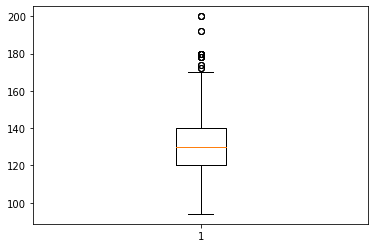

In [10]:
#visualize outliers with boxplot
plt.boxplot(df['trestbps'])

In [11]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=140 + 1.5*(140 - 120)
max_threshold


170.0

In [12]:
#how many outliers do we have (values greater than max_threshold)
outliers=df[df.trestbps>max_threshold]
outliers.shape

(30, 16)

In [13]:
# Removing outliers
df2=df[df.trestbps<max_threshold]
# recalculate summary statistics
df2['trestbps'].describe()

count    980.000000
mean     129.481633
std       14.619403
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
Name: trestbps, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x205842a1e80>,
 'caps': [<matplotlib.lines.Line2D at 0x205842af580>,
 'boxes': [<matplotlib.lines.Line2D at 0x205842a1b20>],
 'medians': [<matplotlib.lines.Line2D at 0x205842afc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x205842afe80>],
 'means': []}

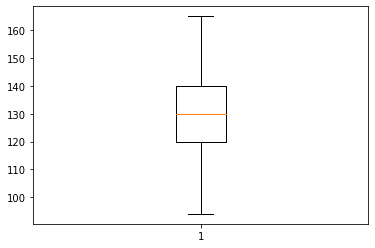

In [14]:
#boxplot after removing outliers
plt.boxplot(df2['trestbps'])

In [15]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x205843112b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20584311970>,
 'boxes': [<matplotlib.lines.Line2D at 0x20584303f10>],
 'medians': [<matplotlib.lines.Line2D at 0x2058431c070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2058431c3d0>],
 'means': []}

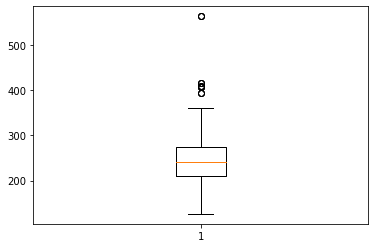

In [16]:
#visualize outliers with boxplot
plt.boxplot(df['chol'])

In [17]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=275 + 1.5*(275 - 211)
max_threshold

371.0

In [18]:
#how many outliers do we have (values greater than max_threshold)
outliers=df[df.chol>max_threshold]
outliers.shape

(16, 16)

In [19]:
# Removing outliers
df3=df2[df2.chol<max_threshold]
# recaculate summary statistics
df3['chol'].describe()

count    964.000000
mean     241.763485
std       45.235579
min      126.000000
25%      209.000000
50%      239.000000
75%      271.000000
max      360.000000
Name: chol, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2058436b700>,
 'caps': [<matplotlib.lines.Line2D at 0x2058436bdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2058436b3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x205843774c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20584377820>],
 'means': []}

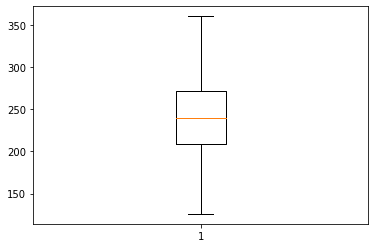

In [20]:
#boxplot after removing outliers
plt.boxplot(df3['chol'])

In [21]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x205843c4dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x205843d14c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205843c4a60>],
 'medians': [<matplotlib.lines.Line2D at 0x205843d1b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x205843d1ee0>],
 'means': []}

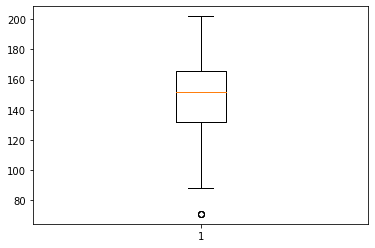

In [22]:
#visualize outliers with boxplot
plt.boxplot(df['thalach'])

In [23]:
#Lower Outlier Threshold = Q1 – 1.5(IQR)
lower_threshold= 132 - 1.5*(166-132)
lower_threshold

81.0

In [24]:
# Removing outliers
df4=df3[df3.thalach>lower_threshold]
# recaculate summary statistics
df4['thalach'].describe()

count    960.000000
mean     149.273958
std       22.894439
min       88.000000
25%      132.000000
50%      152.000000
75%      168.000000
max      202.000000
Name: thalach, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x20584432eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20584440610>,
 'boxes': [<matplotlib.lines.Line2D at 0x20584432b50>],
 'medians': [<matplotlib.lines.Line2D at 0x20584440cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2058444b070>],
 'means': []}

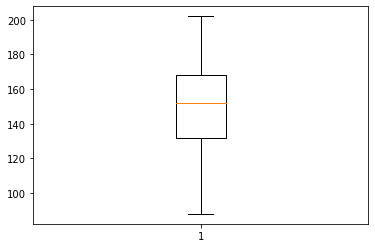

In [25]:
#boxplot after removing outliers
plt.boxplot(df4['thalach'])

In [26]:
df4['oldpeak'].describe()

count    960.000000
mean       1.025729
std        1.139267
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x205844975e0>,
 'caps': [<matplotlib.lines.Line2D at 0x20584497ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20584497280>],
 'medians': [<matplotlib.lines.Line2D at 0x205844a23a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x205844a2700>],
 'means': []}

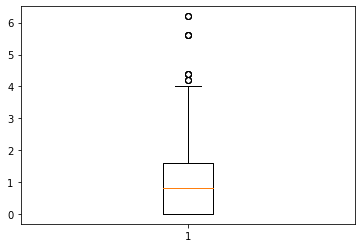

In [27]:
#visualize outliers with boxplot
plt.boxplot(df4['oldpeak'])

In [28]:
# Upper outlier threshold  Q3 + 1.5(IQR)
max_threshold=275 + 1.5*(275 - 211)
max_threshold=1.6+1.5*(1.6)
max_threshold

4.0

In [29]:
# Removing outliers
df5=df4[df4.oldpeak<max_threshold]
# recaculate summary statistics
df5['oldpeak'].describe()

count    942.000000
mean       0.952760
std        1.012424
min        0.000000
25%        0.000000
50%        0.650000
75%        1.600000
max        3.800000
Name: oldpeak, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x205844f85e0>,
 'caps': [<matplotlib.lines.Line2D at 0x205844f8ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x205844f8250>],
 'medians': [<matplotlib.lines.Line2D at 0x205845043a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20584504700>],
 'means': []}

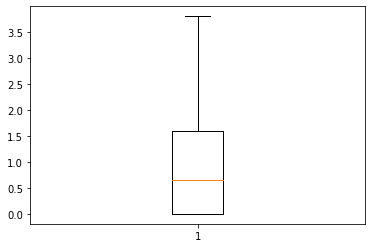

In [30]:
#visualize outliers with boxplot
plt.boxplot(df5['oldpeak'])

In [31]:
# shape of dataset after cleaning dataset
df5.shape

(942, 16)

## Data visualization

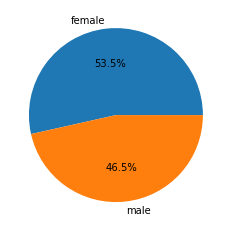

In [32]:
# Percentage of female and male patient with heart disease
plt.pie(x=df5['patient_stat'].value_counts(), labels=df5['gender'].value_counts().index, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='gender'>

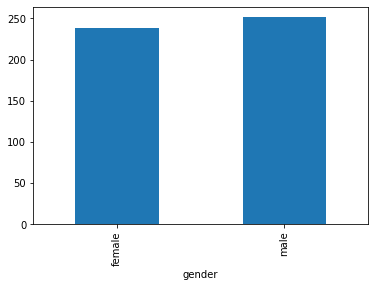

In [33]:
# female and male average cholesterol 
df5.groupby('gender')['chol'].mean().plot.bar()

We can see from the top diagram that males have little higher  cholesterol then females.

C:\Users\supri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


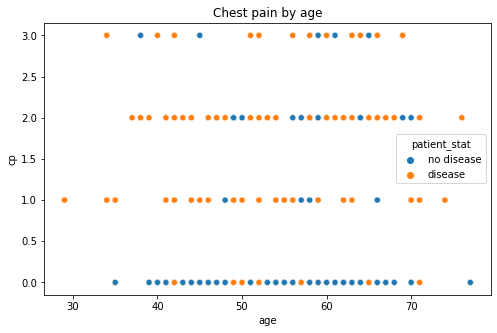

In [34]:
title = 'Chest pain by age'
plt.figure(figsize=(8,5))
sns.scatterplot(df5.age,df5.cp,hue=df5.patient_stat).set_title(title)
plt.ioff()

Patients with no disease have lowest  chest pain at almost every age. Patients with disease have chest pain even in younger ages but it's not high. The most patient with heart disease between 35 and 70 have chest pain value 1-2.

## Categorize "age" column

In [35]:
#Lenght of unique values in age column
len(df5["age"].unique())

41

In [36]:
df5["age"].describe()

count    942.000000
mean      53.933121
std        9.191595
min       29.000000
25%       46.250000
50%       55.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [37]:
df6=df5.copy()

In [38]:
# Defining function that will categorize age column into three groups
def age (row):
    if row["age"]<=35:
        return "Young"
    if(35< row["age"]<=55):
        return "Mid_age"
    else:
        return "Old"

df6["old"]=df6.apply(age,axis=1)

In [39]:
df6.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old


## Categorize "trestbps" column 

In [40]:
#Lenght of unique values in trestbps column
len(df6["trestbps"].unique())

41

In [41]:
df6["trestbps"].describe()

count    942.000000
mean     129.245223
std       14.608543
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      165.000000
Name: trestbps, dtype: float64

In [42]:
#Calculating average blood pressure
df6["trestbps"].mean()

129.24522292993632

In [43]:
df7=df6.copy()

In [44]:
# Defining function that will categorize blood_pressure into three groups
def blood_pressure (row):
    if row["trestbps"]<=115:
        return "Low_pressure"
    if(115< row["trestbps"]<=130):
        return "Normal_pressure"
    else:
        return "High"

df7["blood_pressure_stat"]=df7.apply(blood_pressure,axis=1)
df7.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old,blood_pressure_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age,Normal_pressure
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age,High
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old,High
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old,High
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old,High


## Categorize "chol" column

In [45]:
#Lenght of unique values in chol column
len(df7["chol"].unique())

141

In [46]:
df7["chol"].describe()

count    942.000000
mean     241.866242
std       44.995208
min      126.000000
25%      209.000000
50%      239.000000
75%      270.750000
max      360.000000
Name: chol, dtype: float64

In [47]:
#calculating average cholesterol 
df7["chol"].mean()

241.86624203821657

In [48]:
df8=df7.copy()

In [49]:
#function for categorize chol column into 3 groups
def chol_stat (row):
    if row["chol"]<=160:
        return "Low_chol"
    if(160< row["chol"]<=250):
        return "mid_chol"
    else:
        return "High_chol"

df8["chol_stat"]=df8.apply(chol_stat,axis=1)
df8.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old,blood_pressure_stat,chol_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age,Normal_pressure,mid_chol
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age,High,mid_chol
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old,High,mid_chol
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old,High,mid_chol
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old,High,High_chol


## Categorize "thalach" column

In [50]:
df8["thalach"].describe()

count    942.000000
mean     149.598726
std       22.911471
min       88.000000
25%      132.000000
50%      152.000000
75%      168.000000
max      202.000000
Name: thalach, dtype: float64

In [51]:
# Calculating average value of heart rate
df8["thalach"].mean()

149.59872611464968

In [52]:
df9=df8.copy()

In [53]:
#function to categorize thalach column into  three groups
def heart_rate (row):
    if row["thalach"]<=120:
        return "Low_rate"
    if(110< row["thalach"]<=160):
        return "mid_rate"
    else:
        return "High_rate"

df9["heart_rate_stat"]=df9.apply(heart_rate,axis=1)
df9.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,patient_stat,old,blood_pressure_stat,chol_stat,heart_rate_stat
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,female,no disease,Mid_age,Normal_pressure,mid_chol,High_rate
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,female,no disease,Mid_age,High,mid_chol,mid_rate
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,female,no disease,Old,High,mid_chol,mid_rate
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,female,no disease,Old,High,mid_chol,High_rate
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,male,no disease,Old,High,High_chol,Low_rate


## Categorize "oldpeak" column

In [54]:
df9["oldpeak"].describe()

count    942.000000
mean       0.952760
std        1.012424
min        0.000000
25%        0.000000
50%        0.650000
75%        1.600000
max        3.800000
Name: oldpeak, dtype: float64

In [55]:
#Calculating average depression level
df9["oldpeak"].mean()

0.9527600849256911

In [56]:
df10=df9.copy()

In [57]:
#function that categorize oldpeak column into groups
def depression (row):
    if row["oldpeak"]<=1:
        return "Low_rate"
    if(1< row["oldpeak"]<=2):
        return "mid_rate"
    else:
        return "High_rate"

df10["depression_stat"]=df10.apply(depression,axis=1)
df10.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,gender,patient_stat,old,blood_pressure_stat,chol_stat,heart_rate_stat,depression_stat
0,52,1,0,125,212,0,1,168,0,1.0,...,2,3,0,female,no disease,Mid_age,Normal_pressure,mid_chol,High_rate,Low_rate
1,53,1,0,140,203,1,0,155,1,3.1,...,0,3,0,female,no disease,Mid_age,High,mid_chol,mid_rate,High_rate
2,70,1,0,145,174,0,1,125,1,2.6,...,0,3,0,female,no disease,Old,High,mid_chol,mid_rate,High_rate
3,61,1,0,148,203,0,1,161,0,0.0,...,1,3,0,female,no disease,Old,High,mid_chol,High_rate,Low_rate
4,62,0,0,138,294,1,1,106,0,1.9,...,3,2,0,male,no disease,Old,High,High_chol,Low_rate,mid_rate


## Preparing dataset for model

In [58]:
#Droping columns that we don't need
df11=df10.drop(["age","trestbps","chol","thalach","oldpeak","gender","patient_stat"],axis=1)
df11.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,old,blood_pressure_stat,chol_stat,heart_rate_stat,depression_stat
0,1,0,0,1,0,2,2,3,0,Mid_age,Normal_pressure,mid_chol,High_rate,Low_rate
1,1,0,1,0,1,0,0,3,0,Mid_age,High,mid_chol,mid_rate,High_rate
2,1,0,0,1,1,0,0,3,0,Old,High,mid_chol,mid_rate,High_rate
3,1,0,0,1,0,2,1,3,0,Old,High,mid_chol,High_rate,Low_rate
4,0,0,1,1,0,1,3,2,0,Old,High,High_chol,Low_rate,mid_rate


In [59]:
# Correlation between columns
df11.corr()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
sex,1.000000,-0.095347,0.074141,-0.074408,0.191620,-0.054668,0.163927,0.214558,-0.324446
cp,-0.095347,1.000000,0.087326,0.093940,-0.385233,0.117556,-0.137094,-0.208247,0.421128
fbs,0.074141,0.087326,1.000000,-0.098169,0.016639,-0.066815,0.132349,-0.049656,-0.034485
restecg,-0.074408,0.093940,-0.098169,1.000000,-0.092020,0.105242,-0.085585,0.036545,0.165284
exang,0.191620,-0.385233,0.016639,-0.092020,1.000000,-0.272634,0.103500,0.205471,-0.428829
slope,-0.054668,0.117556,-0.066815,0.105242,-0.272634,1.000000,-0.046988,-0.078462,0.327744
ca,0.163927,-0.137094,0.132349,-0.085585,0.103500,-0.046988,1.000000,0.166768,-0.369773
thal,0.214558,-0.208247,-0.049656,0.036545,0.205471,-0.078462,0.166768,1.000000,-0.356436
target,-0.324446,0.421128,-0.034485,0.165284,-0.428829,0.327744,-0.369773,-0.356436,1.000000


<AxesSubplot:>

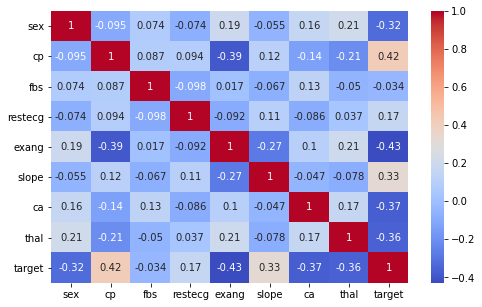

In [60]:
import seaborn as sns
#Showing correlation between columns
plt.figure(figsize=(8,5))
sns.heatmap(df11.corr(), annot=True, cmap='coolwarm')

Everything looks fine. We don't need to drop any column.

### Creating dummy columns

In [61]:
#function for creating dummies
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [62]:
#Using function on dataframe and columns

df12=create_dummies(df11,"old")
df13=df12.drop(["old"],axis=1)

df14=create_dummies(df13,"blood_pressure_stat")
df15=df14.drop(["blood_pressure_stat"],axis=1)

df16=create_dummies(df15,"chol_stat")
df17=df16.drop(["chol_stat"],axis=1)

df18=create_dummies(df17,"heart_rate_stat")
df19=df18.drop(["heart_rate_stat"],axis=1)

df20=create_dummies(df19,"depression_stat")
df21=df20.drop(["depression_stat"],axis=1)

df22=create_dummies(df21,"slope")
df23=df22.drop(["slope"],axis=1)

df24=create_dummies(df23,"ca")
df25=df24.drop(["ca"],axis=1)

df26=create_dummies(df25,"thal")
df27=df26.drop(["thal"],axis=1)



In [63]:
df27.head()

,sex,cp,fbs,restecg,exang,target,old_Mid_age,old_Old,old_Young,blood_pressure_stat_High,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,1,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1,1,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,1,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


### Spliting dataframe on train and test 

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [65]:
# Defining features (X) and target column(y)
X=df27.drop("target",axis=1)
y=df27["target"]

In [66]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.7,random_state=1)

# Predictive models

### K Neighbors classifier model

In [67]:
# Importing KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# Defining model
kn=KNeighborsClassifier()

In [69]:
#Fitting model
kn.fit(train_X, train_y)

KNeighborsClassifier()

In [70]:
#Predicting values on test set
predictions_kn=kn.predict(test_X)

### K Neighbors classifier accuracy

In [71]:
#KNeighborsClassifier accuracy with accuracy_score
accuracy_kn=accuracy_score(test_y, predictions_kn)
accuracy_kn

0.8586572438162544

In [72]:
#KNeighborsClassifier accuracy with cros_val_score
accuracy_cross_val_kn=cross_val_score(kn, X, y, cv=10)
accuracy_cross_val_kn


array([0.93684211, 0.89473684, 0.90425532, 0.80851064, 0.84042553,
       0.90425532, 0.86170213, 0.93617021, 0.88297872, 0.88297872])

In [73]:
#calculating cross_val_score mean
accuracy_cross_val_knc=np.mean(accuracy_cross_val_kn)
accuracy_cross_val_knc

0.8852855543113103

### Logistic Regression model

In [74]:
# Importing LogisticRegression model
from sklearn.linear_model import LogisticRegression

In [75]:
# Defininig model
lr=LogisticRegression()

In [76]:
# fitting the model
lr.fit(train_X, train_y)

LogisticRegression()

In [77]:
# predicting values on test set
predictions_lr=lr.predict(test_X)

In [78]:
# predicting values on test set
predictions_l1r=lr.predict(train_X)

### Logistic Regression accuracy

In [79]:
# calculating accuracy with accuracy_score()
accuracy_lr=accuracy_score(test_y, predictions_lr)
accuracy_lr

0.872791519434629

In [80]:
accuracy_lr1=accuracy_score(train_y, predictions_l1r)
accuracy_lr1

0.8679817905918058

In [81]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_lr=cross_val_score(lr, X, y, cv=10)
accuracy_cross_val_lr

array([0.87368421, 0.90526316, 0.89361702, 0.79787234, 0.86170213,
       0.92553191, 0.84042553, 0.85106383, 0.80851064, 0.80851064])

In [82]:
#calculating cross_val_score mean
accuracy_cross_val_lr=np.mean(accuracy_cross_val_lr)
accuracy_cross_val_lr

0.8566181410974243

## Finding log likelihood of the model

In [83]:
from sklearn.metrics import log_loss
log_likelihood = -log_loss(test_y, predictions_lr)*len(test_y)
log_likelihood

-1243.4119421653886

###  Random Forest classifier model

In [84]:
#Importing RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

In [85]:
#Defining model
rf=RandomForestClassifier(n_estimators=5, random_state=1, min_samples_leaf=2)

In [86]:
# fitting the model
rf.fit(train_X, train_y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=5, random_state=1)

In [87]:
# predicting values on test set
predictions_rf=rf.predict(test_X)

###  Random Forest classifier accuracy

In [88]:
# calculating accuracy with accuracy_score()
accuracy_rf=accuracy_score(test_y, predictions_rf)
accuracy_rf

0.9540636042402827

In [89]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_rf=cross_val_score(rf, X, y, cv=10)
accuracy_cross_val_rf

array([0.94736842, 0.93684211, 1.        , 0.93617021, 0.94680851,
       0.9787234 , 0.9893617 , 0.96808511, 0.94680851, 0.93617021])

In [90]:
#calculating cross_val_score mean
accuracy_cross_val_rf=np.mean(accuracy_cross_val_rf)
accuracy_cross_val_rf

0.958633818589026

### XGBoost Model

In [121]:
from xgboost import XGBClassifier

In [123]:
# fit model no training data
xgb = XGBClassifier()
xgb.fit(train_X, train_y)

C:\Users\supri\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:33] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
# predicting values on test set
predictions_xgb=xgb.predict(test_X)

### XGBoost Accuracy

In [126]:
# calculating accuracy with accuracy_score()
accuracy_xgb=accuracy_score(test_y, predictions_xgb)
accuracy_xgb

0.9964664310954063

In [127]:
# calculating accuracy result with cross_val_score()
accuracy_cross_val_xgb=cross_val_score(xgb, X, y, cv=10)
accuracy_cross_val_xgb

C:\Users\supri\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:30:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:34] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:30:35] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

array([1.        , 1.        , 1.        , 0.96808511, 0.9787234 ,
       1.        , 0.9893617 , 1.        , 1.        , 1.        ])

In [128]:
#calculating cross_val_score mean
accuracy_cross_val_xgb=np.mean(accuracy_cross_val_xgb)
accuracy_cross_val_xgb

0.9936170212765958

# Nested model of the above model (by feature selection)

In [91]:
df=pd.read_csv("C:\\Users\\supri\\Downloads\\Project_heart_disease-main\\Project_heart_disease-main\\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


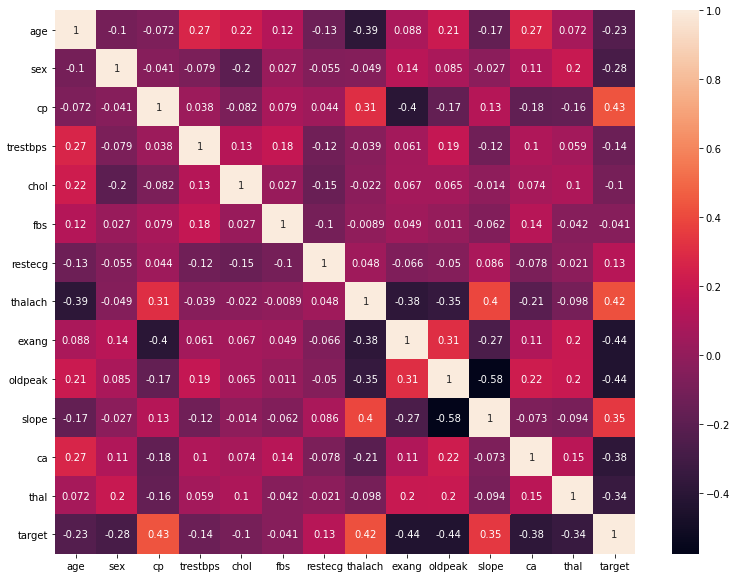

In [92]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr_matrix, annot = True);

After observing Correlatio heatmat, Choosing threshold value as -0.3

In [93]:
threshold=0.2
a=abs(corr_matrix['target'])
result=a[a>0.2]
result

age        0.229324
sex        0.279501
cp         0.434854
thalach    0.422895
exang      0.438029
oldpeak    0.438441
slope      0.345512
ca         0.382085
thal       0.337838
target     1.000000
Name: target, dtype: float64

In [94]:
a=abs(corr_matrix['target'])
result=a[a<0.2]
result

trestbps    0.138772
chol        0.099966
fbs         0.041164
restecg     0.134468
Name: target, dtype: float64

In [95]:
df1=df.drop(["trestbps","chol","fbs","restecg"],axis=1)
df1.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,168,0,1.0,2,2,3,0
1,53,1,0,155,1,3.1,0,0,3,0
2,70,1,0,125,1,2.6,0,0,3,0
3,61,1,0,161,0,0.0,2,1,3,0
4,62,0,0,106,0,1.9,1,3,2,0


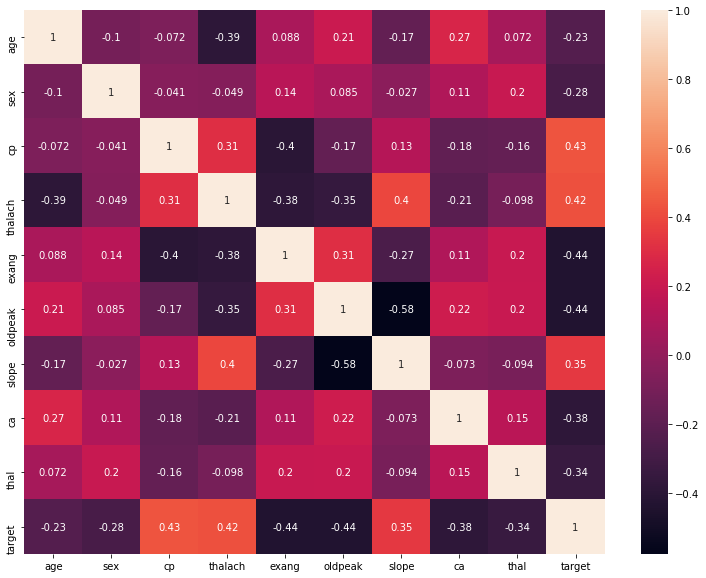

In [96]:
corr_matrix = df1.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(corr_matrix, annot = True);

In [97]:
x = df1.drop('target', axis=1)
Y = df1["target"]

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.7, random_state=2)

In [99]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,Y_train)
Y_pred=regressor.predict(x_test)
Y_pred

C:\Users\supri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [100]:
import sklearn
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.8328690807799443

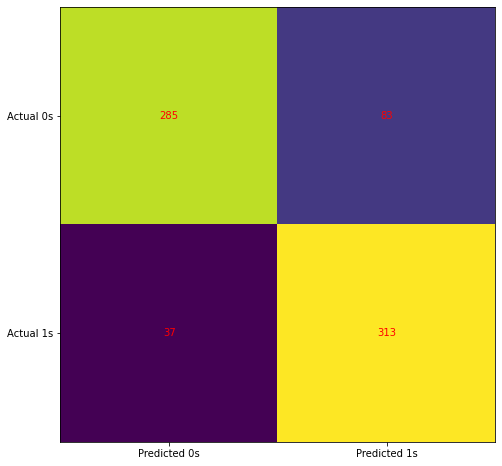

In [101]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Calculating log likelihood

In [102]:
log_likelihood = -log_loss(Y_test,Y_pred)*len(Y_test)
log_likelihood

-4144.719533975988

In [103]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [104]:
Accuracy = (TP+TN)/float(TP+TN+FP+FN)
Sensitivity = TP/float(TP+FN)
Specificity = TN/float(TN+FP)
Positive_Value = TP/float(TP+FP)
print('The acuuracy of the model = ', Accuracy)
print('True Positive Rate = ', Sensitivity)
print('True Negative Rate = ', Specificity)
print('TPositive Predicted Value = ', Positive_Value)

The acuuracy of the model =  0.8328690807799443
True Positive Rate =  0.8942857142857142
True Negative Rate =  0.7744565217391305
TPositive Predicted Value =  0.7904040404040404


In [105]:
# Predicted probabilities of 0 and 1 for the test data 
prob=regressor.predict_proba(x_test)
prob_data=pd.DataFrame(data=prob)
prob_data

,0,1
0,0.987351,0.012649
1,0.320048,0.679952
2,0.993651,0.006349
3,0.987351,0.012649
4,0.063033,0.936967
...,...,...
713,0.843701,0.156299
714,0.549323,0.450677
715,0.873046,0.126954
716,0.098824,0.901176


In [106]:
# Predicted probabilities of 0 and 1 for the test data 
probability=regressor.predict_proba(x_train)[:,:]
prob_data=pd.DataFrame(data=probability)
prob_data

,0,1
0,0.989821,0.010179
1,0.327627,0.672373
2,0.382561,0.617439
3,0.142404,0.857596
4,0.959136,0.040864
...,...,...
302,0.103038,0.896962
303,0.012917,0.987083
304,0.959210,0.040790
305,0.959210,0.040790


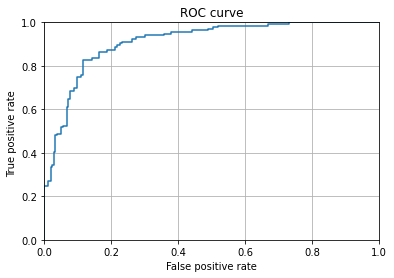

In [107]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.grid(True)

In [108]:
sklearn.metrics.roc_auc_score(Y_test,prob[:,1])

0.9106677018633541

In [109]:
from sklearn.metrics import precision_score
Precision = precision_score(Y_test, Y_pred)
Precision

0.7904040404040404

In [110]:
from sklearn.metrics import recall_score
Recall = recall_score(Y_test, Y_pred)
Recall

0.8942857142857142

In [111]:
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_pred)
f1_score

0.8391420911528149

In [112]:
Y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,

## Calculting Log Likelihood for full model

In [113]:
from sklearn.metrics import log_loss
import numpy as np

true_y = test_y
predictions_lr = predictions_lr

In [114]:
log_likelihood = -log_loss(true_y,predictions_lr)*len(true_y)
log_likelihood

-1243.4119421653886

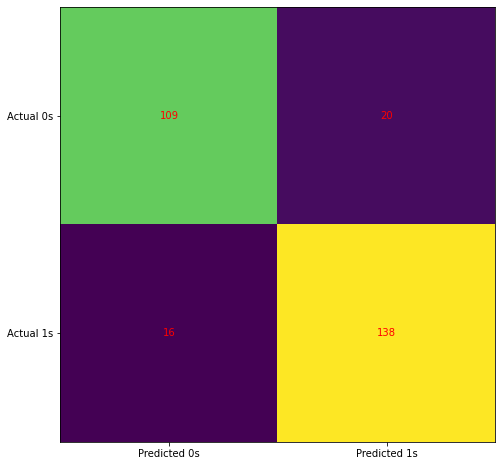

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predictions_lr)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()


In [116]:
Precision_Score = precision_score(test_y, predictions_lr)
Precision_Score

0.8734177215189873

In [117]:
Recall_Score = recall_score(test_y, predictions_lr)
Recall_Score

0.8961038961038961

In [118]:
from sklearn.metrics import f1_score
f1 = f1_score(test_y, predictions_lr)
f1

0.8846153846153846

In [119]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [120]:
Accuracy = (TP+TN)/float(TP+TN+FP+FN)
Sensitivity = TP/float(TP+FN)
Specificity = TN/float(TN+FP)
Positive_Value = TP/float(TP+FP)
print('The acuuracy of the model = ', Accuracy)
print('True Positive Rate = ', Sensitivity)
print('True Negative Rate = ', Specificity)
print('TPositive Predicted Value = ', Positive_Value)

The acuuracy of the model =  0.872791519434629
True Positive Rate =  0.8961038961038961
True Negative Rate =  0.8449612403100775
TPositive Predicted Value =  0.8734177215189873
